In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [233]:
df = pd.read_csv('CONFIDENTIAL_SK_WVS_2022_Data.csv')

In [234]:
kody = {
'SK010': 'Bratislavský',
'SK021': 'Trnavský',
'SK022': 'Trenčiansky',
'SK023': 'Nitriansky',
'SK031': 'Žilinský',
'SK032': 'Banskobystrický',
'SK041': 'Prešovský',
'SK042': 'Košický'
}

df['Kraj'] = df['N'].replace(kody)

#oprava nazvov, ktore nesedia
mapa = {
'Bratislava - mestská časť Staré Mesto':'Bratislava-Staré Mesto',
'Bratislava - m. č. Podunajské Biskupice':'Bratislava-Pod.Biskup.',
'Bratislava - mestská časť Ružinov' :'Bratislava-Ružinov',
'Bratislava - mestská časť Vrakuňa':'Bratislava-Vrakuňa',
'Bratislava - mestská časť Nové Mesto':'Bratislava-Nové Mesto',
'Bratislava - mestská časť Rača':'Bratislava-Rača',
'Bratislava - mestská časť Dúbravka':'Bratislava-Dúbravka',
'Bratislava - mestská časť Karlova Ves':'Bratislava-Karlova Ves',
'Bratislava - mestská časť Petržalka':'Bratislava-Petržalka',
'Oščadnia':'Čadca',
'Košice - mestská časť Sever':'Košice-Sever', 
'Košice - m. č. Dargovských hrdinov':'Košice-Dargov.hrdinov',
'Košice - mestská časť Západ':'Košice-Západ',
'Košice - mestská časť Sídlisko KVP':'Košice-Sídlisko KVP', 
'Košice - mestská časť Juh':'Košice-Juh'
}

obce = df['G1'].unique()
zoznam = pd.read_excel('Kopia_-_Ciselnik_spravnych_uzemi_SR.xlsx')
zoznam = zoznam.loc[:, ['Obec_názov', 'Okres_názov']].set_index('Obec_názov').to_dict()['Okres_názov']

df['G1'] = df['G1'].replace(mapa)
okresy = df['G1'].map(zoznam).reset_index()

In [235]:
df.loc[okresy[okresy['G1'].isna()].index, 'G1'].unique()

array([], dtype=object)

In [236]:
df['Okres'] = okresy['G1']

<AxesSubplot:xlabel='Q3', ylabel='Q2'>

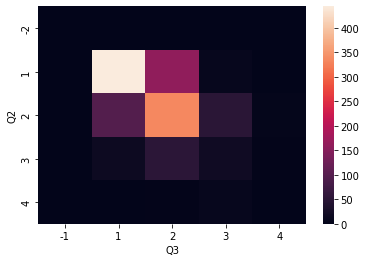

In [237]:
#korelacna mapa medzi dvoma kategorickimy premennymi
a = df.iloc[:, [5, 6]].value_counts().reset_index()
a = a.pivot_table(index='Q2', columns="Q3", values=0)
a.fillna(0, inplace=True)
sns.heatmap(a)

In [258]:
def create_map(data, question, district=True, minimum=None, maximum=None, colors="Accent_r"):
    col = ""
    n = ""
    if district:
        gj = gpd.read_file('districts_epsg_3395.geojson')
        gj.sort_values('NM3', inplace=True)
        col = "Okres"
        n = "NM3"
    else:
        gj = gpd.read_file('regions_epsg_3395.geojson')
        gj.sort_values('NM4', inplace=True)
        col = "Kraj"
        n = "NM4"

    calculated = data.loc[:, [col, question]].groupby(col).mean()
    gj['Value'] = gj[n].map(calculated.to_dict()[question])
    
    fig, ax = plt.subplots(figsize=(40, 20))
    
    gj.plot(ax=ax, color='white', edgecolor='k',linewidth = 0.5, figsize=(60, 20))
    gj.plot(ax=ax, column="Value", figsize=(40, 20), vmin=min(minimum, gj['Value'].min()), vmax=maximum, legend=True, cmap='Accent_r')
    cb_ax = ax.figure.axes[1] 
    cb_ax.tick_params(labelsize=30)
    plt.axis('off')

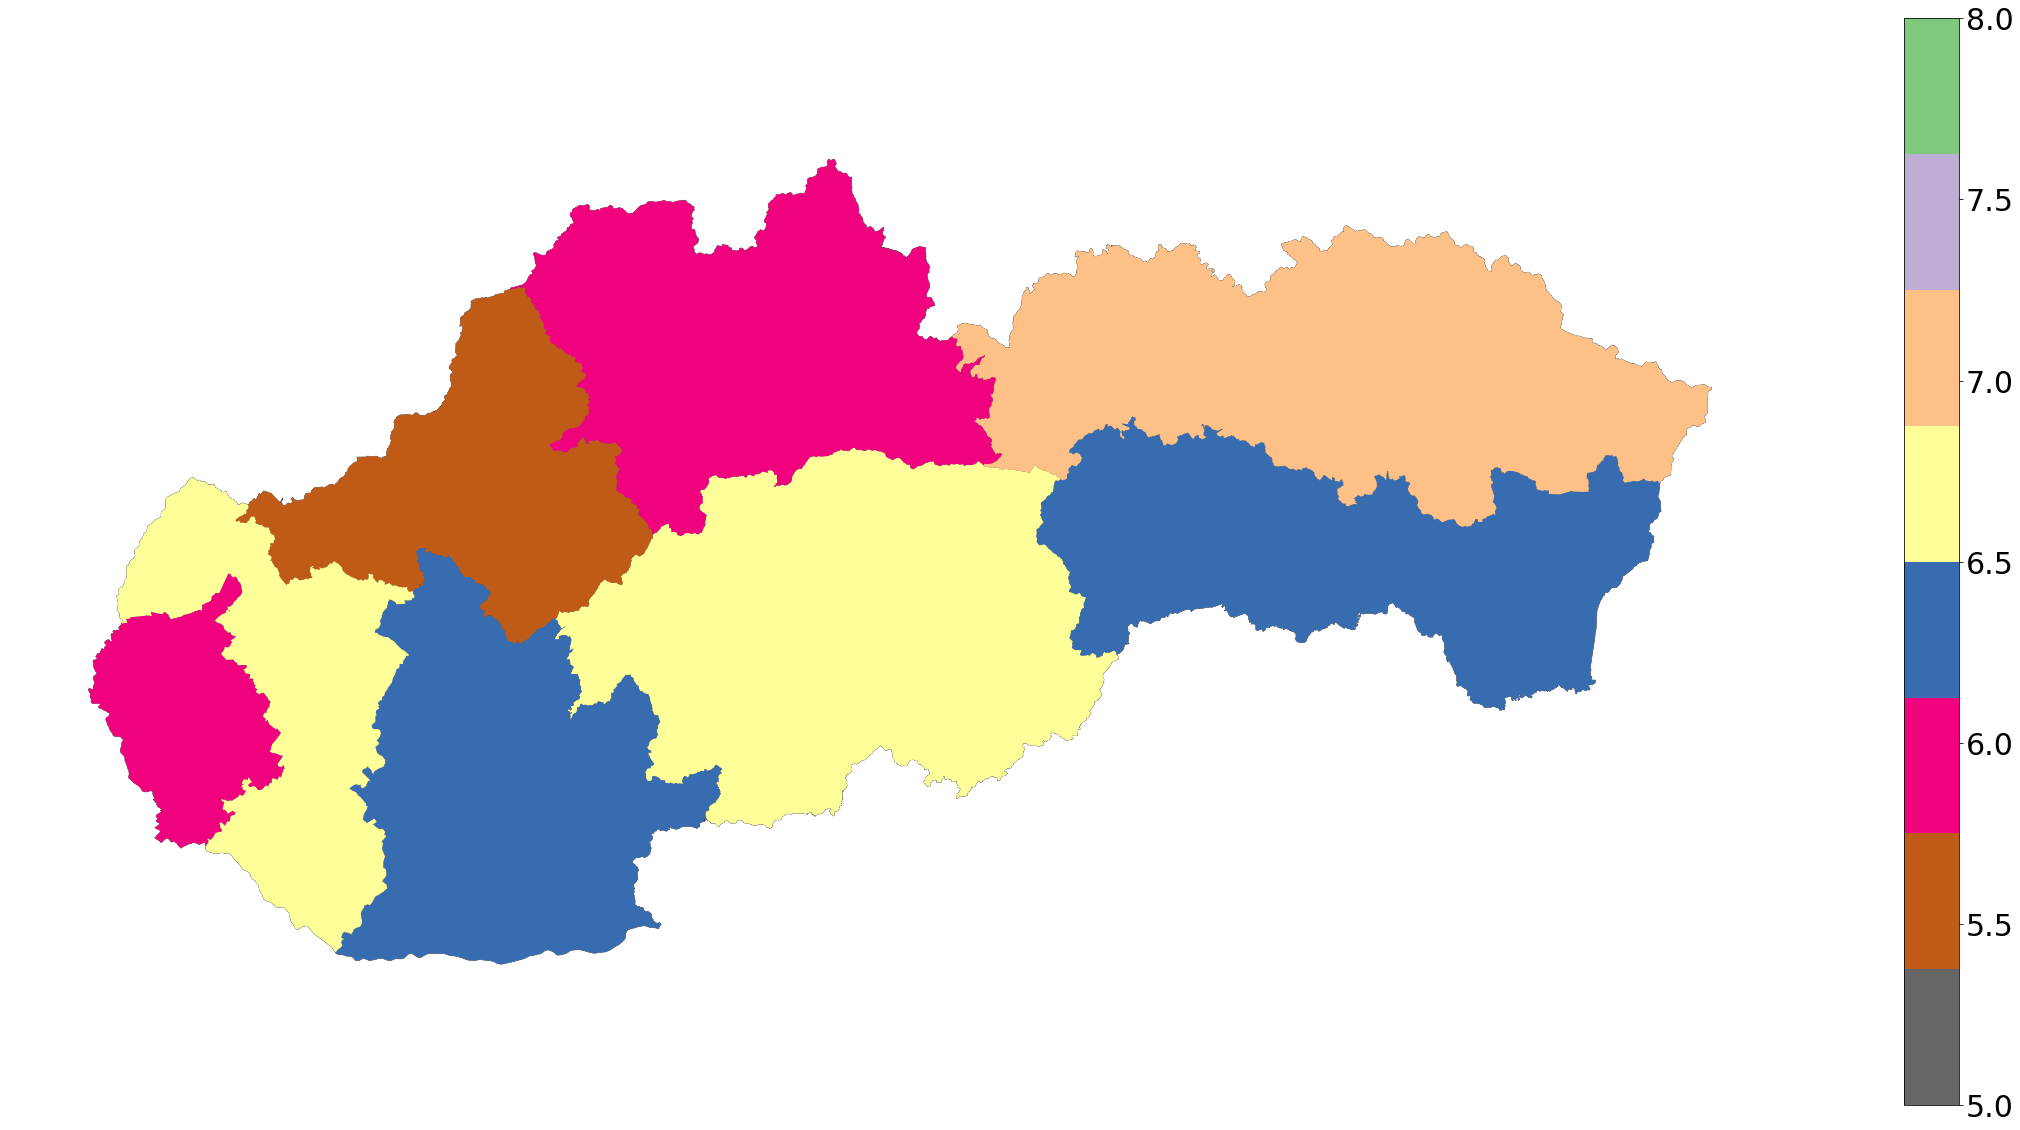

In [259]:
create_map(df, 'Q162', False, 5, 8, 'Accent_r')

In [240]:
df98 = pd.read_excel('F00008126-WV3_Data_Slovakia_Excel_v20221107.xlsx')

C:\Users\hrech\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<BarContainer object of 2 artists>

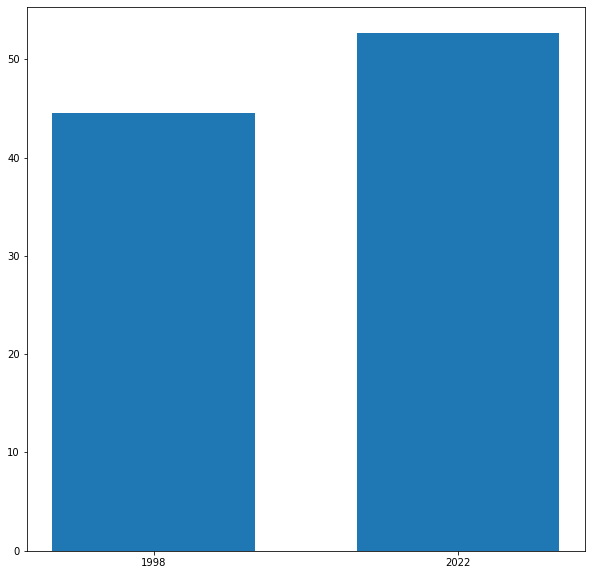

In [241]:
plt.figure(figsize=(10, 10))
x_pos = [0.45, 0.6]
plt.xticks(x_pos, ['1998', '2022'])
plt.bar(x_pos, [df98['V216: Age'].mean(), df['Q262'].mean()], width=0.1)

In [264]:
df[df['Q35'] >= 1]['Q35']

0       5
1       3
2       4
3       3
4       2
       ..
1195    2
1196    4
1197    3
1198    1
1199    4
Name: Q35, Length: 1185, dtype: int64

(array([112., 332., 360., 275., 106.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

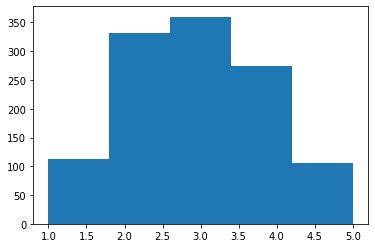

In [266]:
plt.hist(df[df['Q35'] >= 1]['Q35'], bins=5)

[112, 332, 360, 275, 106]

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

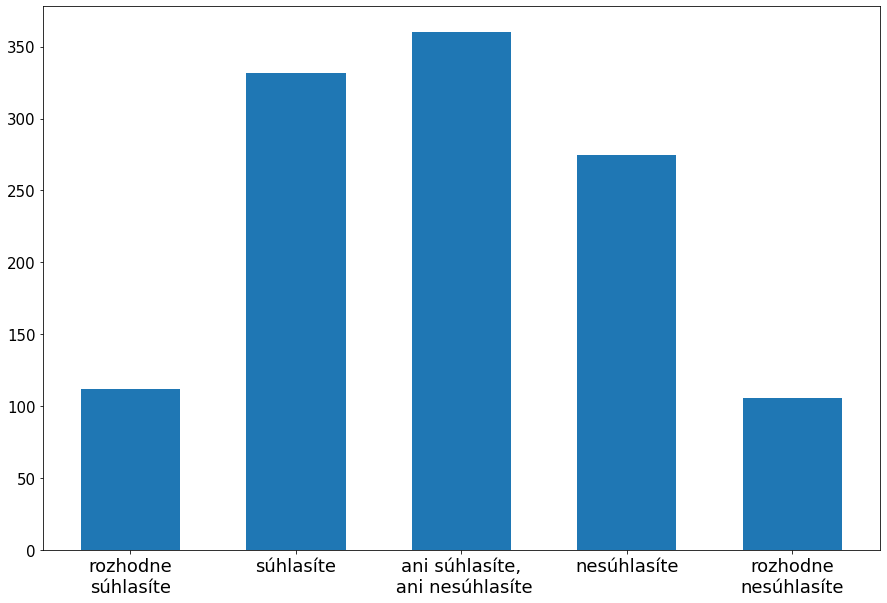

In [286]:
plt.figure(figsize=(15, 10))
x_pos = list(range(1, 6))
plt.bar(x_pos, df[df['Q35'] >= 1]['Q35'].value_counts().sort_index().tolist(), width=0.6)
plt.xticks(x_pos, ['rozhodne\nsúhlasíte', 'súhlasíte', 'ani súhlasíte,\n ani nesúhlasíte', 'nesúhlasíte', 'rozhodne\nnesúhlasíte'], fontsize=18)
plt.yticks(fontsize=15)